## 🎓 Persona : Léa, jeune investisseuse étudiante

**Profil :**
- 👩 24 ans, diplômée de l'EM Lyon
- 💼 Première expérience professionnelle après 2 ans d'alternance
- 💰 Aide parentale pour le financement + épargne personnelle (~15 000 €)
- 🎯 Objectif : réaliser un **premier investissement locatif** dans une **ville étudiante dynamique**

---

### 💡 Objectif d'investissement
> Trouver le **meilleur investissement locatif étudiant** possible avec un **budget global de 200 000 €**,  
> en ciblant un **studio à Lille**, tout en comparant brièvement avec un **T1 à Angers ou Nancy**.

---

### 💰 Hypothèses financières
| Élément | Montant estimé |
|----------|----------------|
| Prix d'achat visé | 160 000 – 180 000 € |
| Apport personnel | 15 000 € |
| Prêt immobilier estimé | 180 000 € sur 20 ans |
| Budget total (frais inclus) | **≈ 200 000 €** |
| Objectif de rentabilité brute | **≥ 5 %** |

---

### 🏙️ Cibles principales
| Ville | Type de bien | Prix moyen au m² | Loyer moyen mensuel | Observations |
|-------|---------------|------------------|---------------------|---------------|
| **Lille** | Studio (20–25 m²) | ~4 500 €/m² | 550–600 € | Marché étudiant tendu, forte demande locative |
| **Angers** | T1 (25–30 m²) | ~3 200 €/m² | 450–500 € | Ville très dynamique, bonne rentabilité brute |
| **Nancy** | T1 (25–30 m²) | ~2 800 €/m² | 420–470 € | Marché abordable, bon rapport prix/rentabilité |

---

### 🔍 Besoins data de Léa
- Identifier **les quartiers les plus rentables** à Lille (ou dans des villes comparables)
- Comparer avec **la rentabilité moyenne en France**
- Analyser l'**évolution du prix au m² et des loyers étudiants** depuis 5 ans
- Calculer la **rentabilité locative brute et nette** par quartier
- Visualiser les **zones à forte concentration étudiante**
- Fournir une **recommandation finale : "où investir avec 200k€ ?"**
- Évaluer le **taux de vacance locative** par quartier pour anticiper les périodes creuses (notamment l'été où les étudiants quittent les logements)
- Analyser la **proximité des transports en commun** et des universités/grandes écoles pour identifier les zones les plus attractives pour les étudiants
- Estimer les **charges de copropriété moyennes** par type de bien et par quartier pour affiner le calcul de rentabilité nette
- Identifier les **opportunités de biens nécessitant des travaux** (décote à l'achat) pour maximiser la plus-value à long terme

---

### 🧭 Objectif du notebook
Créer un outil interactif permettant à Léa de :
1. Comparer la rentabilité d'un **studio à Lille** avec celle d'un **T1 à Angers ou Nancy**  
2. Explorer visuellement les **zones à potentiel locatif élevé**  
3. Obtenir une **recommandation automatique** en fonction de son budget et de ses préférences

## Import des bibliothèques ##

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests, zipfile
from io import BytesIO

### 1e vision : Analyse générale en France ###

Etude de la rentabilité moyenne en France

In [ ]:
print("Partie Valentine")

Evolution du prix au m² et des loyers étudiants depuis 5 ans en France

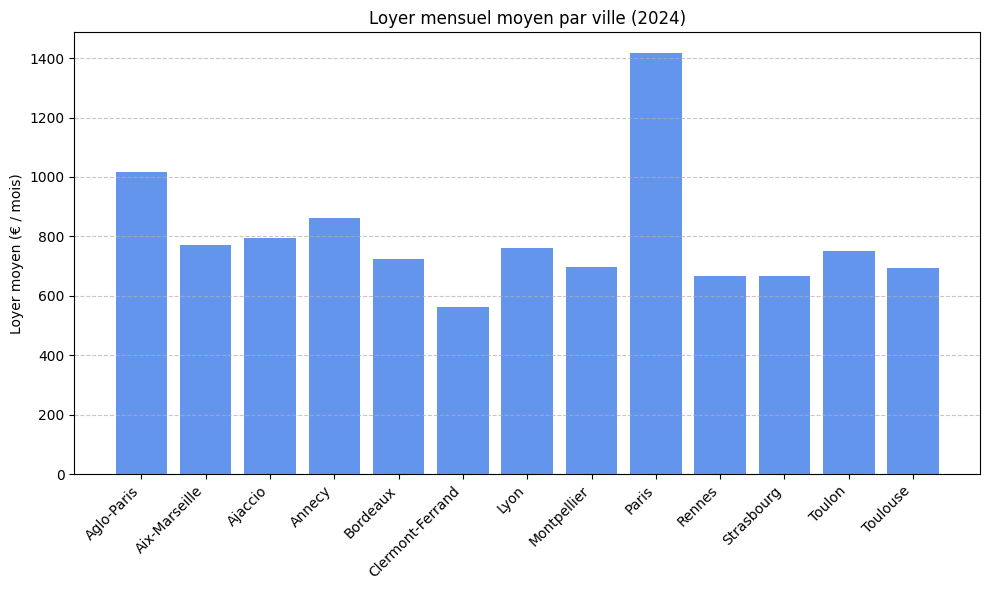

In [13]:
# ======================================================================
# VERSION IDENTIQUE À TON CODE, MAIS FONCTIONNELLE AVEC LE LIEN HUGGINGFACE
# ======================================================================



# --- Étape 1 : Télécharger et extraire le dossier temporairement ---
url_zip = "https://huggingface.co/datasets/analysedonneesfoncieresdata/analyse_fonciere_data/resolve/main/data_loyer.zip"
folder = "data_loyer"

response = requests.get(url_zip)
if response.status_code == 200:
    with zipfile.ZipFile(BytesIO(response.content)) as zip_ref:
        zip_ref.extractall(folder)
else:
    raise Exception(f"❌ Erreur lors du téléchargement (code {response.status_code})")

# --- Vérification du dossier ---
if not os.path.exists(folder):
    raise FileNotFoundError(f"❌ Dossier introuvable : {folder}")


# --- Liste pour stocker les données de chaque ville ---
all_data = []

# --- Lecture de tous les fichiers CSV ---
for file in os.listdir(folder):
    if file.endswith(".csv"):
        city_name = file.split("_")[-1].replace(".csv", "")  # extrait le nom de la ville
        df = pd.read_csv(os.path.join(folder, file), sep=";", encoding="ISO-8859-1")

        # Calcul du loyer moyen mensuel
        if "moyenne_loyer_mensuel" in df.columns:
            # Remplacement de la virgule par un point pour éviter les erreurs de conversion
            df["moyenne_loyer_mensuel"] = df["moyenne_loyer_mensuel"].astype(str).str.replace(",", ".")
            df["moyenne_loyer_mensuel"] = pd.to_numeric(df["moyenne_loyer_mensuel"], errors="coerce")
            mean_rent = df["moyenne_loyer_mensuel"].dropna().mean()
            all_data.append({"Ville": city_name, "Loyer_moyen": mean_rent})

# --- Création du DataFrame final ---
df_villes = pd.DataFrame(all_data)

# --- Tri par ordre alphabétique des villes ---
df_villes = df_villes.sort_values(by="Ville")

# --- Visualisation ---
plt.figure(figsize=(10,6))
plt.bar(df_villes["Ville"], df_villes["Loyer_moyen"], color='cornflowerblue')
plt.title("Loyer mensuel moyen par ville (2024)")
plt.ylabel("Loyer moyen (€ / mois)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Visualiser les zones à forte concentration étudiante en France

In [ ]:
print("Partie Adam")

Évaluer le taux de vacance locative en France, et les zones propices à un taux élevé

In [ ]:
print("Partie Lucien")